# LAb4: Modelos polinomiais

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Ana Sofia Preto Oliveira
## Número: 39275

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab4.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

# Pergunta 1 - Discriminantes polinomiais:
### Considere o ficheiro pickle $\texttt{Lab4-T51N-P1.p}$ onde se encontra um dicionário de Python com as seguintes variáveis:
* #### "data":       dados bi-dimensionais (4000 amostras)
* #### "target":     classe dos dados (inteiros de 0 a 3)
* #### "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
* #### "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores
## a) Use os dados de treino para estimar discriminante polinomial de 4ª ordem.
## b) Calcule as matrizes de confusão e o número total de erros nos dados de treino e de teste. Imprima os resultados.
## c) Faça um "plot" dos dados de teste por classe, e dos erros do discriminante polinomial.
## d) Explique brevemente porque é que mais de metade dos pontos da classe "1" não são bem classificados 

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
D=pickle.load(open('Lab4-T51N-P1.p','rb'))
print(D.keys())

X = D.data
y = D.target

foldTrain = D.foldTrain
foldTest = D.foldTest

# Treino
X1 = X[:, foldTrain]
y1 = y[foldTrain]

# Teste
X2 = X[:, foldTest]
y2 = y[foldTest]

print(X.shape, y.shape)
print(X1.shape, y1.shape)
print(X2.shape, y2.shape)

dict_keys(['data', 'target', 'foldTrain', 'foldTest'])
(2, 4000) (4000,)
(2, 400) (400,)
(2, 3600) (3600,)


## 1.a)

In [73]:
## a) Use os dados de treino para estimar discriminante polinomial de 4ª ordem.

from sklearn.preprocessing import PolynomialFeatures
import scipy.linalg as la 

poly = PolynomialFeatures(4).fit(X1.T)
X1p = poly.transform(X1.T)

n_classes_treino = np.unique(y1).shape[0]
n_amostras_treino = y1.shape[0]
#print(n_classes_treino, n_amostras_treino)

Y1 = -np.ones((n_classes_treino, n_amostras_treino))

for i in range(n_classes_treino): 
    Y1[i, y1==i] = 1

Xb = X1p.T

Rx = np.dot(Xb, Xb.T)
rxy = np.dot(Xb, Y1.T)

w = np.dot(la.pinv(Rx), rxy)

## 1.b)

In [74]:
## b) Calcule as matrizes de confusão e o número total de erros nos dados de treino e de teste. Imprima os resultados.
X2p = poly.transform(X2.T)

n_classes_teste = np.unique(y2).shape[0]
n_amostras_teste = y2.shape[0]
#print(n_classes_teste, n_amostras_teste)

Y2 = -np.ones((n_classes_teste, n_amostras_teste))

for i in range(n_classes_teste): 
    Y2[i, y2==i] = 1

Y1e = np.dot(w.T, X1p.T)
Y2e = np.dot(w.T, X2p.T)

y1e = np.argmax(Y1e, axis=0)
y2e = np.argmax(Y2e, axis=0)

#print(y1.shape, y2.shape)
#print(y1e.shape, y2e.shape)

print("TREINO: ")
print("Matriz de confusão: \n", confusion_matrix(y1, y1e))
print("Número de Erros: ", np.sum(y1 != y1e))
print("")

print("TESTE: ")
print("Matriz de confusão: \n", confusion_matrix(y2, y2e))
print("Número de Erros: ", np.sum(y2 != y2e))
print("")

TREINO: 
Matriz de confusão: 
 [[ 99   0   0   1]
 [  0 100   0   0]
 [  0   0 100   0]
 [  0   0   0 100]]
Número de Erros:  1

TESTE: 
Matriz de confusão: 
 [[419 325  55 101]
 [  0 900   0   0]
 [  0   0 900   0]
 [  3   0   0 897]]
Número de Erros:  484



## 1.c)

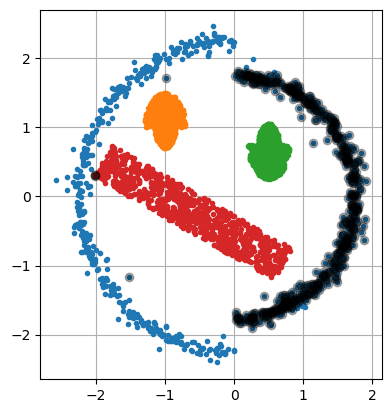

In [75]:
## c) Faça um "plot" dos dados de teste por classe, e dos erros do discriminante polinomial.
plt.figure()
plt.plot(X2[0, y2==0], X2[1, y2==0], '.')
plt.plot(X2[0, y2==1], X2[1, y2==1], '.')
plt.plot(X2[0, y2==2], X2[1, y2==2], '.')
plt.plot(X2[0, y2==3], X2[1, y2==3], '.')
plt.plot(X2[0, y2e != y2], X2[1, y2e != y2], 'ok', alpha=0.3)
plt.axis("scaled")
plt.grid(True)



## 1.d)

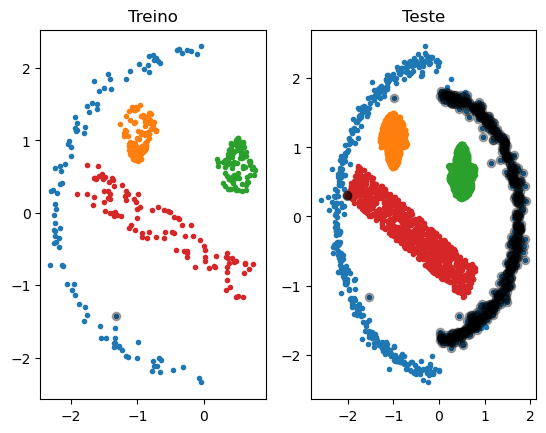

In [76]:
## d) Explique brevemente porque é que mais de metade dos pontos da classe "1" não são bem classificados 

## Os dados de treino não são representativos das amostras nos dados de teste. Para além disso, o classificador entrou em sobreaprendizagem. 
## Ou seja, "decorou" os dados de treino. Desta forma, metade dos dados de treino da classe "1", que não estavam no conjunto de teste, são mal classificados. 

plt.figure()
plt.subplot(121)
plt.title("Treino")
plt.plot(X1[0, y1==0], X1[1, y1==0], '.')
plt.plot(X1[0, y1==1], X1[1, y1==1], '.')
plt.plot(X1[0, y1==2], X1[1, y1==2], '.')
plt.plot(X1[0, y1==3], X1[1, y1==3], '.')
plt.plot(X1[0, y1e != y1], X1[1, y1e != y1], 'ok', alpha=0.3)

plt.subplot(122)
plt.title("Teste")
plt.plot(X2[0, y2==0], X2[1, y2==0], '.')
plt.plot(X2[0, y2==1], X2[1, y2==1], '.')
plt.plot(X2[0, y2==2], X2[1, y2==2], '.')
plt.plot(X2[0, y2==3], X2[1, y2==3], '.')
plt.plot(X2[0, y2e != y2], X2[1, y2e != y2], 'ok', alpha=0.3)

<hr style="border:2px solid black"> </hr>

# Pergunta 2 - Regressão polinomial:
### Considere o ficheiro pickle $\texttt{Lab4-T51N-P2.p}$ onde se encontra um dicionário de Python com as seguintes variáveis:
* #### "x":       dados uni-dimensionais/variável independente (500 pontos)
* #### "y":       variável dependente/saídas desejadas (500 pontos)
* #### "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
* #### "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores

## a) Use os dados de treino para estimar um regressor polinomial de 5ª ordem. Imprima os valores dos pesos.
## b) Calcule o coeficiente de determinação ($\bf R^2$) para os dados de treino e para os dados de teste.
## c) Faça um "plot" do polinómio estimado. Visualize o polinómio conjutamente com os dados de teste. 
## d)  Explique brevemente porque é que o modelo não está bem adaptado aos dados de teste.

In [77]:
D=pickle.load(open('Lab4-T51N-P2.p','rb'))
D.keys()

X = D.x
y = D.y

foldTrain = D.foldTrain
foldTest = D.foldTest

# Treino
X1 = X[foldTrain][:, np.newaxis]
y1 = y[foldTrain]

# Teste
X2 = X[foldTest][:, np.newaxis]
y2 = y[foldTest]

## 2.a)

In [83]:
## a) Use os dados de treino para estimar um regressor polinomial de 5ª ordem. Imprima os valores dos pesos.
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(5, include_bias=False).fit(X1)
X1p = poly.transform(X1)

lr = LinearRegression().fit(X1p, y1)

w0 = lr.intercept_
ws = lr.coef_

print("W 0 : ", w0)

for i in range(len(ws)): 
    print("W", i+1, ": ", ws[i])



W 0 :  3.9464796817086962
W 1 :  1.6673813115415033
W 2 :  -0.2503372310489722
W 3 :  -0.45238482308987055
W 4 :  0.038819638007476724
W 5 :  0.00883479266659161


## 2.b)

In [79]:
## b) Calcule o coeficiente de determinação ($\bf R^2$) para os dados de treino e para os dados de teste.
X2p = poly.transform(X2)

score_treino = lr.score(X1p, y1)
score_teste = lr.score(X2p, y2)

print("Coeficiente de determinação - Treino: ", score_treino)
print("Coeficiente de determinação - Teste: ", score_teste)

Coeficiente de determinação - Treino:  0.961163242355513
Coeficiente de determinação - Teste:  -4.295877410654202


## 2.c)

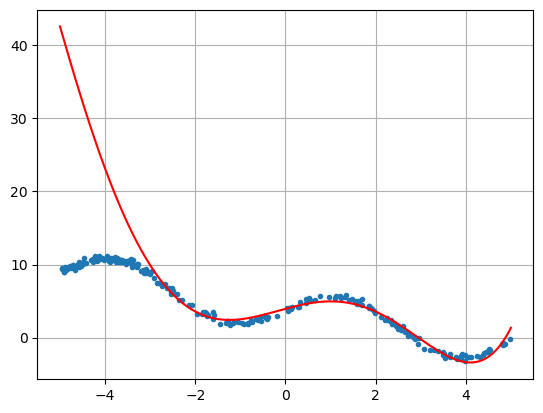

In [80]:
## c) Faça um "plot" do polinómio estimado. Visualize o polinómio conjutamente com os dados de teste. 

xtmp = np.linspace(-5, 5, 200)
ytmp = w0 + ws[0]*xtmp + ws[1]*xtmp**2 + ws[2]*xtmp**3 + ws[3]*xtmp**4 + ws[4]*xtmp**5

plt.figure()
plt.plot(X2, y2, '.')
plt.plot(xtmp, ytmp, 'r')
plt.grid(True)



## 2.d)

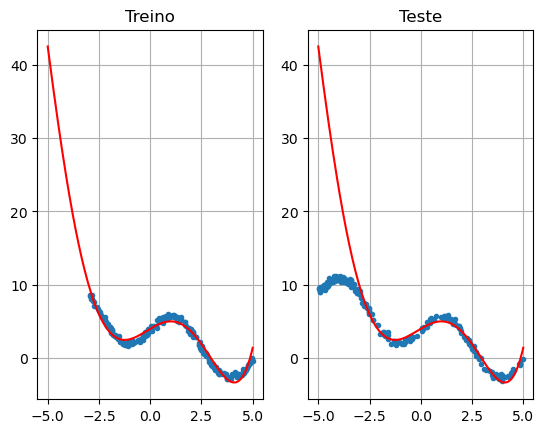

In [81]:
## d)  Explique brevemente porque é que o modelo não está bem adaptado aos dados de teste.

## O modelo não está bem adaptado aos dados de teste porque os dados de treino não são representativos do conjunto de dados. 
# Ou seja, o modelo não acompanha a distribuição dos dados de teste, pois não foi treinado com a mesma distribuição com os dados de treino. 

plt.figure()
plt.subplot(121)
plt.title("Treino")
plt.plot(X1, y1, '.')
plt.plot(xtmp, ytmp, 'r')
plt.grid(True)

plt.subplot(122)
plt.title("Teste")
plt.plot(X2, y2, '.')
plt.plot(xtmp, ytmp, 'r')
plt.grid(True)